In [1]:
cd /home/chenxupeng/projects/deepshape/

/home/chenxupeng/projects/deepshape


In [2]:
import numpy as np
import argparse, sys, os, errno
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from tqdm import tqdm
import keras as K
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from unet_128_model_row_column import *
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

Using TensorFlow backend.


In [6]:
with h5py.File('/home/chenxupeng/projects/deepshape/data/new/train_1') as f:
    images_train = f['train_images'][:1000]
with h5py.File('/home/chenxupeng/projects/deepshape/data/new/test_0') as f:
    images_test= f['test_images'][:1000]
with h5py.File('/home/chenxupeng/projects/deepshape/data/new/Spitale_2015_invivo_CDS_0.1') as f:
    y_train = f['y_train'][:1000]
    y_test = f['y_test'][:1000]
y_train = np.concatenate([y_train,y_train],axis = 1)
y_test= np.concatenate([y_test,y_test],axis = 1)
#y size 256

In [ ]:
from keras.models import load_model
model = load_model('output/newunet_row_col_mse.hdf5')

Populating the interactive namespace from numpy and matplotlib


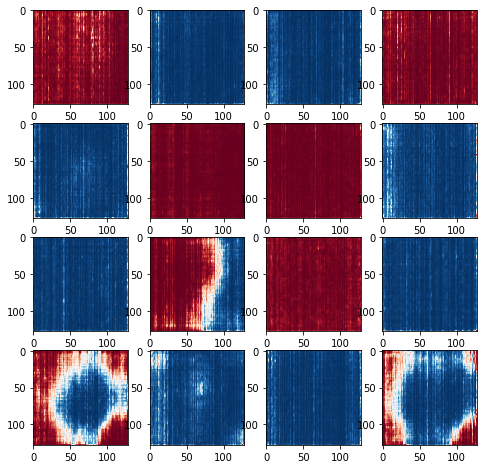

In [24]:
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp]+ [K.learning_phase()], outputs ) # evaluation function
# Testing
layer_outs = functor([images_test[:50], 1.])
#imshow 查看输出  94  91
import matplotlib.pyplot as plt
%pylab inline
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        ax[j,i].imshow(layer_outs[94][i*4+j,:,:,0],cmap=cm.RdBu_r)

In [30]:
b = np.load('/home/chenxupeng/projects/deepshape/output/unet_predict0.npy')

In [101]:
weights = h5py.File('output/newunet_weights_1.hdf5')

(array([ 1.,  0.,  2.,  1.,  0.,  0.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  3.,  1.,  2.,  0.,
         2.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  1.,  1.,  2.]),
 array([-0.402661  , -0.38678174, -0.37090249, -0.35502324, -0.33914399,
        -0.32326473, -0.30738548, -0.29150623, -0.27562698, -0.25974772,
        -0.24386847, -0.22798922, -0.21210997, -0.19623071, -0.18035146,
        -0.16447221, -0.14859295, -0.1327137 , -0.11683445, -0.1009552 ,
        -0.08507594, -0.06919669, -0.05331744, -0.03743819, -0.02155893,
        -0.00567968,  0.01019957,  0.02607882,  0.04195808,  0.05783733,
         0.07371658,  0.08959583,  0.10547509,  0.12135434,  0.13723359,
         0.15311284,  0.1689921 ,  0.18487135,  0.2007506 ,  0.21662985,
         0.23250911,  0.24838836,  0.26426761,  0.28014686,  0.29602612,
         0.31190537,  0.32778462,  0.34366387,  0.35954313,

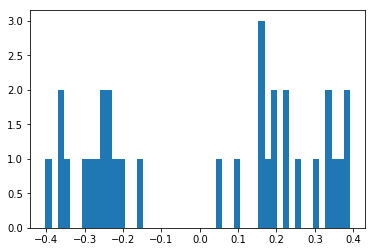

In [120]:
hist(weights['conv2d_69/conv2d_69/kernel:0'][:].flatten(),bins =50)

In [64]:
np.abs(weights[0]).flatten()

array([ 0.04075397,  0.05833072,  0.00320405, ...,  0.07187954,
        0.04653677,  0.07539184], dtype=float32)

In [66]:
np.max(np.abs(weights[0]).flatten())

0.31577942

In [32]:
c = {}
for i in range(1000):
    index = np.where(np.isnan(y_test[i]) ==0)[0]
    c[i] = b[i][index]

In [34]:
c[1]

array([ 0.07683542,  0.99696356,  0.58331442,  0.00804483,  0.93075985], dtype=float32)

In [17]:
a = {}
for i in range(1000):
    index = np.where(np.isnan(y_test[i]) ==0)[0]
    a[i] = y_test[i][index]

In [35]:
a[0]

array([ 1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.], dtype=float32)

In [21]:
count_0 = {}
count_1 = {}
ratio = {}
for i in range(1000):
    whole = a[i].shape[0]
    count_1[i] = np.sum(a[i])
    count_0[i] = whole -count_1[i]
#正样本的比例
    ratio[i] = count_1[i] / whole

In [25]:
ratio_ = np.array([val for key,val in ratio.iteritems()])
count_1_ = np.array([val for key,val in count_1.iteritems()])
count_0_ = np.array([val for key,val in count_0.iteritems()])

In [29]:
np.sum(count_1_)/(np.sum(count_1_)+np.sum(count_0_))

0.5087093899376165

In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/chenxupeng/apps/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['concatenate', 'f', 'number']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([ 59.,   0.,   2.,   8.,   5.,  14.,  10.,  19.,  14.,   7.,  28.,
         27.,  41.,  21.,  26.,  29.,  38.,  15.,  25.,  20.,  37.,  26.,
         24.,  11.,   0.,  78.,  21.,  20.,  23.,   6.,  33.,  23.,  11.,
         26.,  27.,  16.,  12.,  16.,  13.,   3.,  28.,  16.,  20.,  17.,
          8.,  23.,  10.,   8.,   1.,  35.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

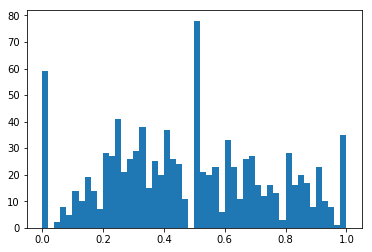

In [24]:
hist(ratio_,bins =50)

In [3]:
cd /home/chenxupeng/projects/deepshape/

/home/chenxupeng/projects/deepshape


In [12]:
#analyze model output

In [20]:
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp]+ [K.learning_phase()], outputs ) # evaluation function
# Testing
layer_outs = functor([images_test[:50], 1.])

In [22]:
layer_outs[94].shape

(50, 128, 128, 1)

In [30]:
#存一下输出
with h5py.File('newunet_row_col_output_mse') as f:
    for i in range(102):
        f.create_dataset(str(i),data = layer_outs[i])

In [35]:
def check_sym(array):
    out = ((array - array.T) ** 2).mean(axis=None)
    return out

In [24]:
mse = {}
for i in range(95):
    mse[i] = {}
    shape = layer_outs[i].shape
    for j in range(shape[0]):
        mse[i][j] = {}
        for t in range(shape[3]):
            mse[i][j][t]=check_sym(layer_outs[i][j,:,:,t])

In [25]:
#转换一层的dict to array
def dict_array(dict,t):
    array = np.ndarray([50,len(mse[t][0])])
    for i in range(len(mse[t])):
        array[i] = np.array([val for key,val in np.array([val for key,val in mse[t].iteritems()])[i].iteritems()])
    array = array.flatten()
    return array

In [37]:
hist(dict_array(mse,94),bins = 50)

NameError: name 'dict_array' is not defined